In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_df.describe(include='all')

# describe 는 수치형 데이터만 가져오지만 (include='all')을 하면 문자열도 가져옴

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- x축, y축에 필요한 정보를 넣어서 시각화
- 범주형 데이터, 연속형 자료형, 관측치(Y)축

<Axes: xlabel='day', ylabel='count'>

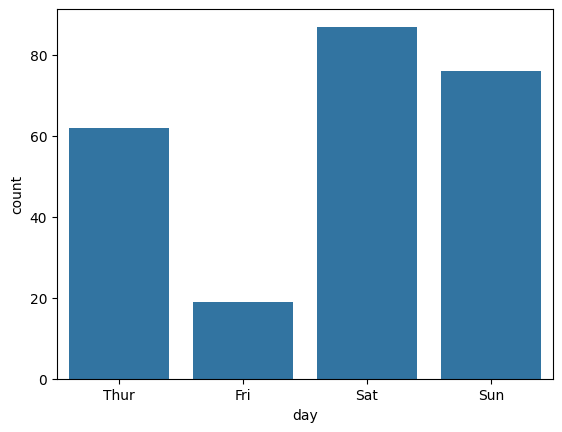

In [6]:
# countplot : x축 범주형, y측 관측치

sns.countplot(data=tips_df, x = 'day')

<Axes: xlabel='sex', ylabel='tip'>

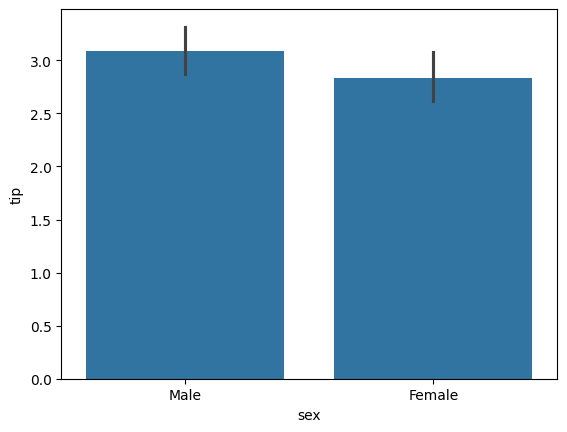

In [9]:
# barplot : x축 범주형, y축이 연속형 값

sns.barplot(data=tips_df, x = 'sex', y='tip', estimator='mean')

<Axes: xlabel='time', ylabel='total_bill'>

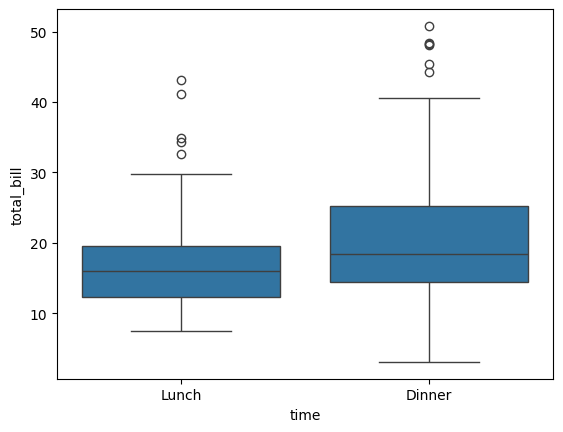

In [10]:
sns.boxplot(data=tips_df, x='time', y='total_bill')

<Axes: xlabel='total_bill', ylabel='Count'>

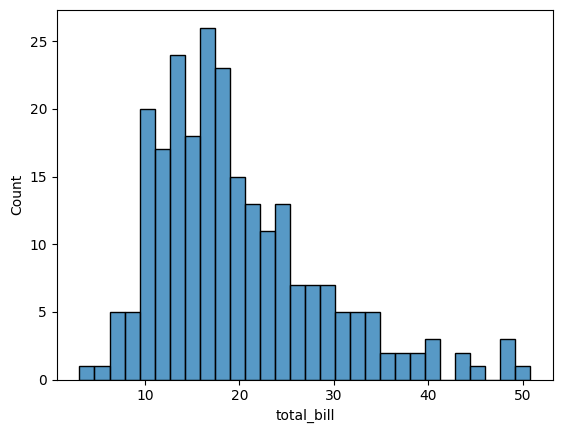

In [12]:
sns.histplot(data=tips_df, x='total_bill', bins=30)

<Axes: ylabel='Frequency'>

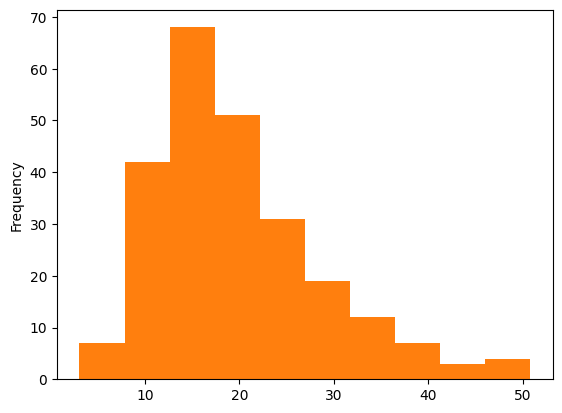

In [14]:
tips_df['total_bill'].hist()  # dataframe 시리즈에서도 히스토그램을 지원함
tips_df['total_bill'].plot.hist()

<Axes: xlabel='total_bill', ylabel='tip'>

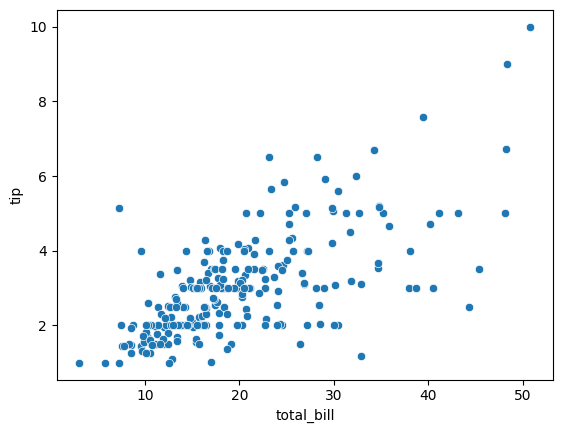

In [15]:
# x축: 수치형변수
# y축: 수치형변수

sns.scatterplot(data=tips_df, x = 'total_bill', y='tip')

# 점을 찍어 분포를 보기엔 좋음
# 문제는 겹쳐져 있는 데이터가 얼만큼 뭉쳐져 있는지 알 수 없음. (-> 데이터 분포를 따로 봐야함))

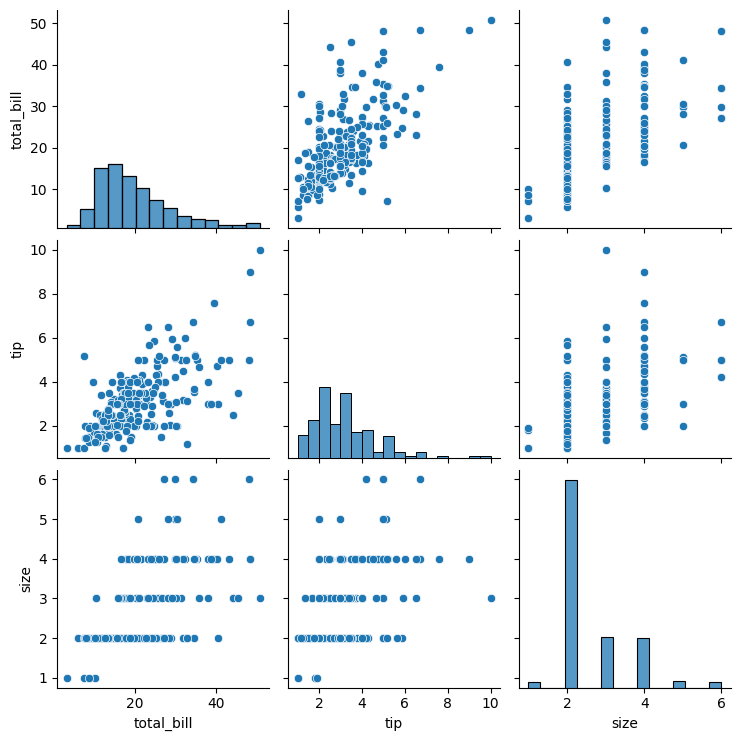

In [16]:
sns.pairplot(data=tips_df)

# 같은 구간이 만나면 히스토그램으로 표현함
# 범주형 데이터는 따로 봐야함

- ESD 이상치 처리

In [29]:
import numpy as np

mean = np.mean(tips_df['total_bill'])
std = np.std(tips_df['total_bill'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit)
print(lower_limit)

46.43839435626422
-6.866509110362578


In [20]:
tips_df[['total_bill']].head(3)

,total_bill
0,16.99
1,10.34
2,21.01


In [21]:
# 불리언 인덱싱

cond = tips_df['total_bill'] > 46.4
cond

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: total_bill, Length: 244, dtype: bool

In [22]:
# false 는 제외 되고 true 값안 나오게 됨
tips_df[cond]

# 데이터 양이 작아서 데이터 자체를 삭제하기 곤란한 경우에는, 값을 상한이상치에 근접한 숫자로 대체할 수 있음 48->46

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


- IQR을 이용한 이상치 확인 (boxplot)

<Axes: ylabel='total_bill'>

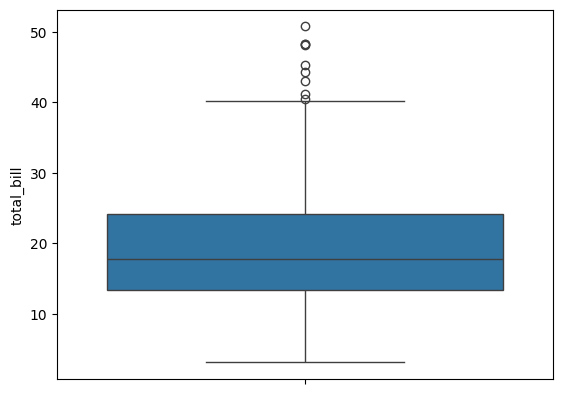

In [23]:
import seaborn as sns
sns.boxplot(tips_df['total_bill'])

In [35]:
q1 = tips_df['total_bill'].quantile(0.25)
q3 = tips_df['total_bill'].quantile(0.75)
iqr = q3 - q1
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3, iqr, upper_limit2, lower_limit2)

13.3475 24.127499999999998 10.779999999999998 40.29749999999999 -2.8224999999999945


In [33]:
cond2 = (tips_df['total_bill'] > upper_limit2)
tips_df[cond2]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4
